In [27]:
import numpy as np
from scipy import signal

In [28]:
A = np.array([[0,1], [0,0]])

In [29]:
B = np.array([[0],[1]])

In [30]:
C = np.array([[0,0]])
D = np.array([[0]])

In [31]:
H = np.array([[1,0]])

In [32]:
Q = np.array([[0.01]])

In [124]:
R = np.array([[1]])

In [125]:
x0 = np.array([[0],[0]])

---

In [126]:
dt = 1.0

In [127]:
t_steps = 100

In [128]:
state_space = signal.StateSpace(A,B,C,D)

In [129]:
time = np.arange(0,t_steps,dt)

In [130]:
F = state_space.to_discrete(dt).A

In [131]:
G = state_space.to_discrete(dt).B

---

In [132]:
def xtrue(F:np.ndarray, G:np.ndarray, H:np.ndarray, Q:np.ndarray, R:np.ndarray, x0:np.ndarray, t_steps:int):
    '''
    A function to compute true state-space history
    and true observations from a discrete-time
    model with no input. For use with a Kalman Filter
    
    Inputs: F   Xsize*Xsize state transition matrix
            G   Xsize*Vsize state noise transition matrix
            H   Zsize*Xsize observation matrix
            Q   Vsize*Vsize process noise covariance matrix
            R   Zsize*Zsize observation noise covariance matrix
            x0  Xsize*1 initial state vector 
            t_steps, number of time-steps to be simulated
    
    Outputs: z  Zsize*t_steps Observation time history
             x  Xsize*t_steps true state time history
    '''
    
    assert (F.shape[0] == F.shape[1]), "F is non-square"
    assert (F.shape[0] == x0.shape[0]), "x0 does not match dimension of F"
    assert (G.shape[0] == x0.shape[0]), "G does not match dimension of x0"
    assert (Q.shape[0] == Q.shape[1]), "Q is non-square"
    assert (G.shape[1] == Q.shape[0]), "Q does not match dimension of G"
    assert (R.shape[0] == R.shape[1]), "R is non-square"
    assert (R.shape[0] == H.shape[0]), "R does not match dimension of H"
    #-------#
    x_size = F.shape[0]
    z_size = H.shape[0]
    v_size = G.shape[1]
    
    x = np.zeros((x_size, t_steps))
    z = np.zeros((z_size, t_steps))
    
    v = np.sqrt(Q) * np.random.randn(v_size, t_steps)
    w = np.sqrt(R) * np.random.randn(z_size, t_steps)
    
    x[:,0, None] = x0
    
    for i in range(0,t_steps-1):
        x[:,i+1] = (F.dot(x[:,i]) + G.dot(v[:,i]))
    
    for i in range(0,t_steps):
        z[:,i] = (H.dot(x[:,i]) + w[:,i])
        
    return z,x

z, x = xtrue(F, G, H, Q, R, x0, t_steps)

# Class Implementation

In [133]:
class xtrue():
    def __init__(self,F:np.ndarray, G:np.ndarray, H:np.ndarray, Q:np.ndarray, R:np.ndarray, x0:np.ndarray, t_steps:int):
        assert (F.shape[0] == F.shape[1]), "F is non-square"
        assert (F.shape[0] == x0.shape[0]), "x0 does not match dimension of F"
        assert (G.shape[0] == x0.shape[0]), "G does not match dimension of x0"
        assert (Q.shape[0] == Q.shape[1]), "Q is non-square"
        assert (G.shape[1] == Q.shape[0]), "Q does not match dimension of G"
        assert (R.shape[0] == R.shape[1]), "R is non-square"
        assert (R.shape[0] == H.shape[0]), "R does not match dimension of H"
        
        self.x_size = F.shape[0]
        self.z_size = H.shape[0]
        self.v_size = G.shape[1]
        self.F = F
        self.G = G
        self.H = H
        self.Q = Q
        self.R = R
        self.t_steps = t_steps
        self.x0 = x0
        
        self.x = np.zeros((self.x_size, t_steps))
        self.z = np.zeros((self.z_size, t_steps))
        
        self.v = np.sqrt(Q) * np.random.randn(self.v_size, self.t_steps)
        self.w = np.sqrt(R) * np.random.randn(self.z_size, self.t_steps)
        
        self.x[:,0, None] = x0
        
        for i in range(0,t_steps-1):
            self.x[:,i+1] = (self.F.dot(self.x[:,i]) + self.G.dot(self.v[:,i]))
    
        for i in range(0,t_steps):
            self.z[:,i] = (self.H.dot(self.x[:,i]) + self.w[:,i])
        
    def __repr__(self):
        value_dict = {"F matrix:": self.F,
                      "G matrix:": self.G,
                      "H matrix:": self.H,
                      "Q matrix:": self.Q,
                      "R matrix:": self.R,
                      "x0: ": self.x0,
                      "t_steps:": self.t_steps}
        
        return str(value_dict)
    
    def return_values(self):
        return self.z, self.x

In [134]:
test = xtrue(F, G, H, Q, R, x0, t_steps)

In [135]:
test

{'F matrix:': array([[1., 1.],
       [0., 1.]]), 'G matrix:': array([[0.5],
       [1. ]]), 'H matrix:': array([[1, 0]]), 'Q matrix:': array([[0.01]]), 'R matrix:': array([[1]]), 'x0: ': array([[0],
       [0]]), 't_steps:': 100}

In [136]:
z, x = test.return_values()

---

## Plot the X True values

In [137]:
import matplotlib.pyplot as plt

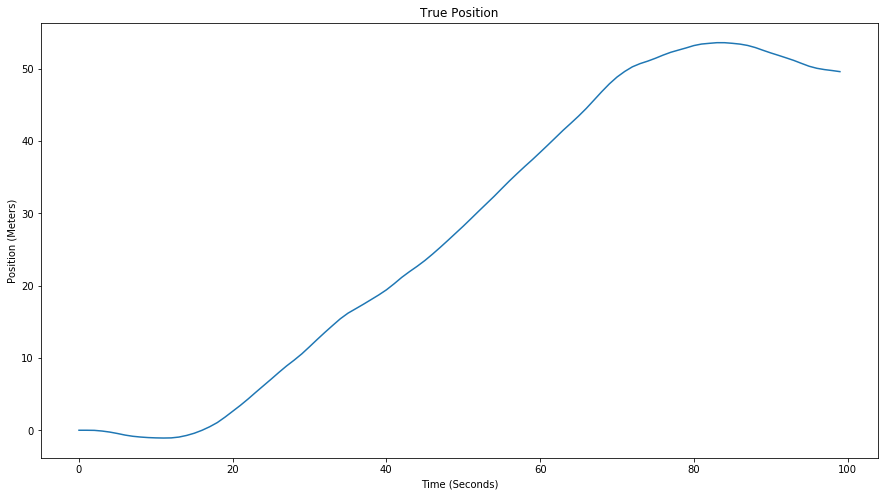

In [138]:
_, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(time, x[0,:])
plt.title("True Position")
plt.xlabel("Time (Seconds)")
plt.ylabel("Position (Meters)")
plt.show()

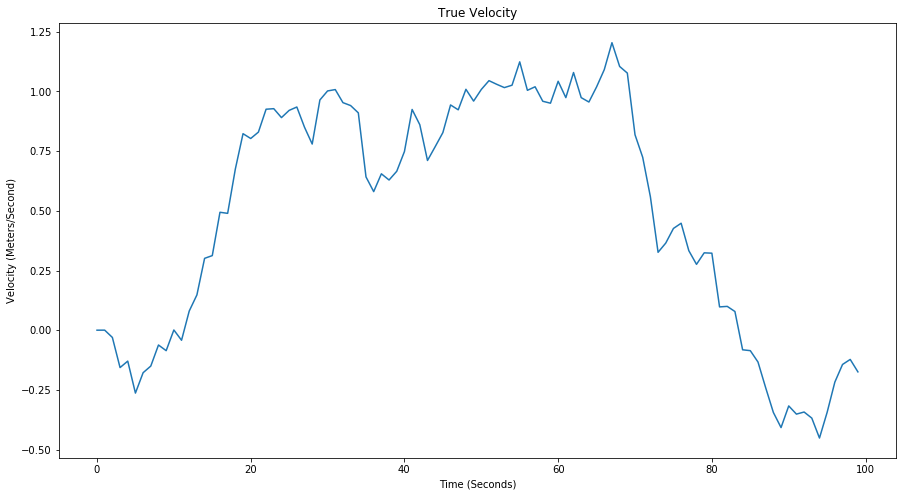

In [139]:
_, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(time, x[1,:])
plt.title("True Velocity")
plt.xlabel("Time (Seconds)")
plt.ylabel("Velocity (Meters/Second)")
plt.show()

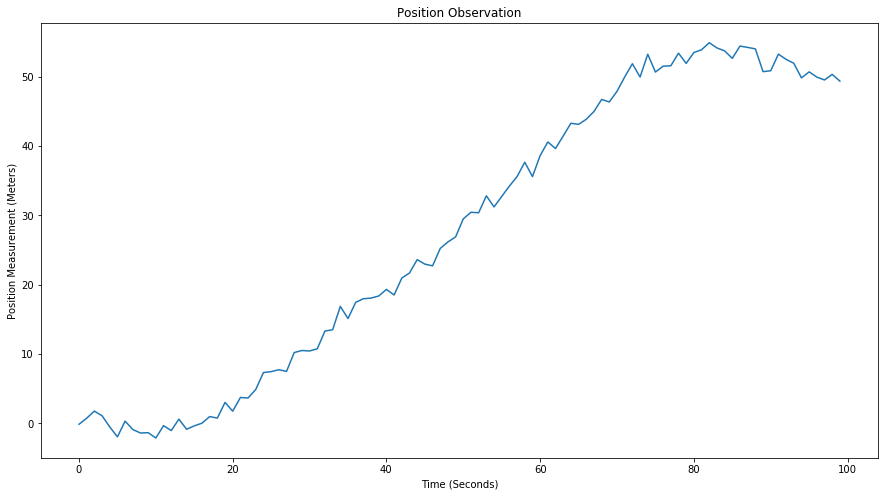

In [140]:
_, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(time, z[0,:])
plt.title("Position Observation")
plt.xlabel("Time (Seconds)")
plt.ylabel("Position Measurement (Meters)")
plt.show()

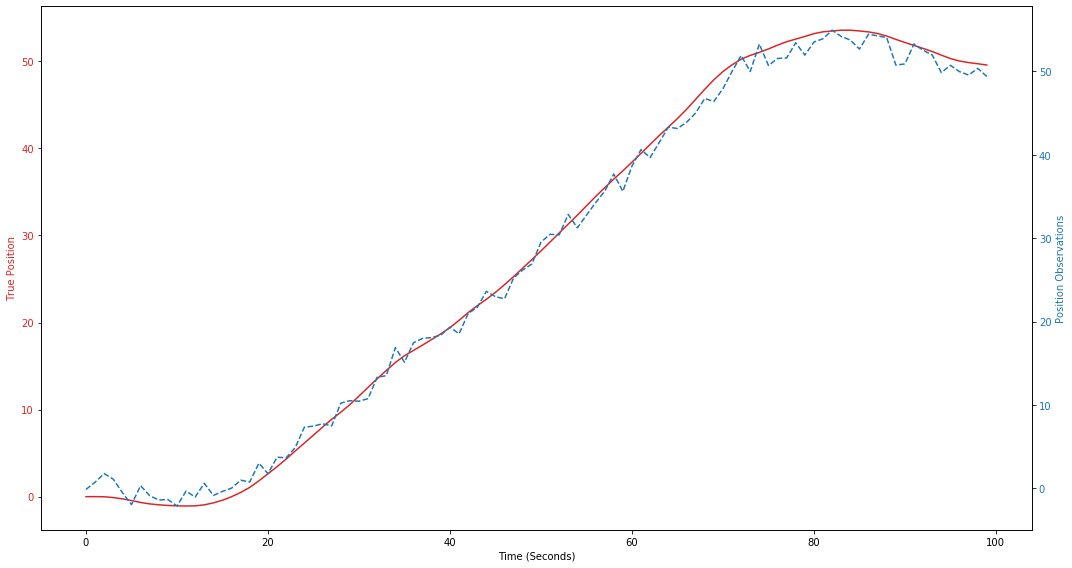

In [141]:
# Check true target track and position observations
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

color = 'tab:red'
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('True Position', color=color)
ax1.plot(time, x[0,:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Position Observations', color=color)  
ax2.plot(time, z[0,:], color=color, linestyle = '--')
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [142]:
z[0,:].mean()

27.59476743016196